In [118]:
from cProfile import label

import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv("./raw-datasets/bone.csv")
df.head()

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,1,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3,10/10,matched,0,0,matched,high,peripheral_blood,no,7.20,5.38,1.33876,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,2,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0,10/10,matched,0,0,matched,low,bone_marrow,no,4.50,0.41,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,3,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2,10/10,matched,0,0,matched,low,bone_marrow,no,7.94,0.42,19.01323,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,4,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1,10/10,matched,0,0,matched,low,bone_marrow,no,4.25,0.14,29.481647,23.0,29.0,yes,yes,19.0,?,no,53.0,1
4,5,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0,9/10,matched,2,1,one_antigen,high,peripheral_blood,no,51.85,13.05,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0


In [119]:
df.columns

Index(['id', 'donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status'],
      dtype='object')

# Data
- Numerical
    - donor_age
    - recipient_age
    - recipient_body_mass
    - HLA_match
    - antigen (?)
    - allel(?)
    - CD34_x1e6_per_kg
    -
- Numerical Categorical

- Categorical
    - recipient_gender
    - donor_age_below_35
    - donor_cmv
    - recipient_age_below_10
    - recipient_age_int (?)
    - recipient_ABO
    - recipient_rh
    - recipient_cmv
    - disease
    - disease_group
    - gender_match
    - ABO_match
    - CMV_status (?)
    - HLA_mismatch
    - HLA_group_1
    - risk_group
    - stem_cell_source
    - tx_post_relapse

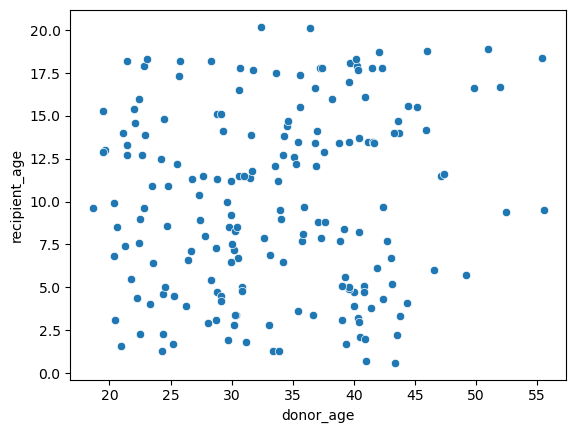

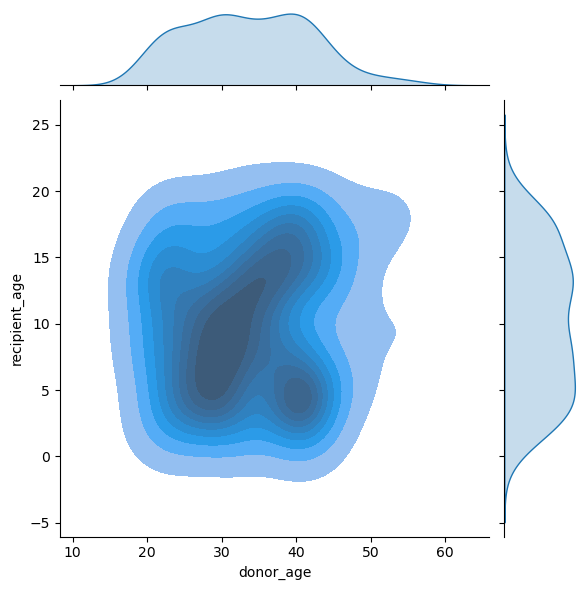

In [120]:
import seaborn as sns

sns.scatterplot(
    data=df,
    x="donor_age",
    y="recipient_age"
)

sns.jointplot(
    data=df,
    x="donor_age",
    y="recipient_age",
    kind="kde",
    fill=True
)

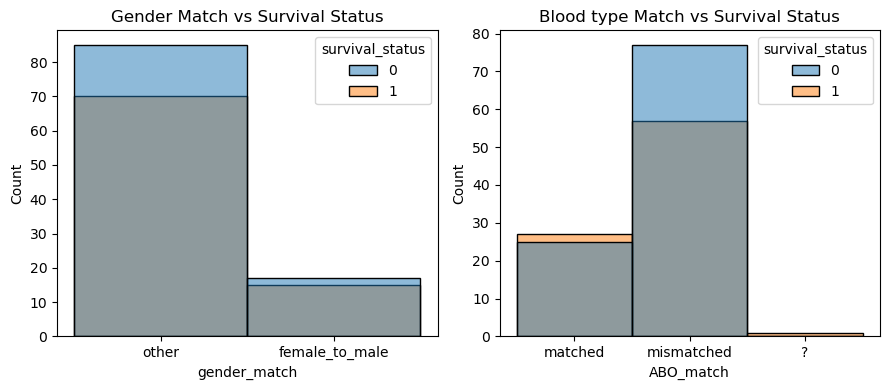

In [121]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(9,4))

sns.histplot(
    x="gender_match",
    hue="survival_status",
    data=df,
    ax=axes[0]
)
axes[0].set_title("Gender Match vs Survival Status")

sns.histplot(
    x="ABO_match",
    hue="survival_status",
    data=df,
    ax=axes[1]
)
axes[1].set_title("Blood type Match vs Survival Status")


plt.tight_layout()
plt.show()

In [122]:
df = df.applymap(lambda x: -1 if x == '?' else x)
df["HLA_match"] = df["HLA_match"].apply(lambda x: int(x.split('/')[0]))
df.convert_dtypes()

df

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,1,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3,10,matched,0,0,matched,high,peripheral_blood,no,7.20,5.38,1.33876,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,2,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0,10,matched,0,0,matched,low,bone_marrow,no,4.50,0.41,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,3,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2,10,matched,0,0,matched,low,bone_marrow,no,7.94,0.42,19.01323,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,4,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1,10,matched,0,0,matched,low,bone_marrow,no,4.25,0.14,29.481647,23.0,29.0,yes,yes,19.0,-1,no,53.0,1
4,5,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0,9,matched,2,1,one_antigen,high,peripheral_blood,no,51.85,13.05,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,37.575342,no,A,present,12.9,no,10_20,male,44.0,A,minus,present,lymphoma,malignant,other,matched,3,10,matched,0,0,matched,high,peripheral_blood,yes,11.08,4.39,2.52275,15.0,22.0,yes,yes,16.0,no,yes,385.0,1
183,184,22.895890,yes,A,absent,13.9,no,10_20,female,44.5,0,plus,present,AML,malignant,other,mismatched,2,10,matched,0,0,matched,high,peripheral_blood,no,4.64,4.47,1.038858,12.0,30.0,no,no,1000000.0,no,no,634.0,1
184,185,27.347945,yes,A,present,10.4,no,10_20,female,33.0,B,plus,present,nonmalignant,nonmalignant,other,mismatched,3,10,matched,0,0,matched,low,peripheral_blood,no,7.73,4.73,1.635559,16.0,16.0,yes,no,1000000.0,no,no,1895.0,0
185,186,27.780822,yes,A,absent,8.0,yes,5_10,male,24.0,0,plus,absent,chronic,malignant,other,mismatched,0,9,matched,2,1,one_antigen,low,peripheral_blood,no,15.41,1.91,8.07777,13.0,14.0,yes,yes,54.0,yes,no,382.0,1


<Axes: >

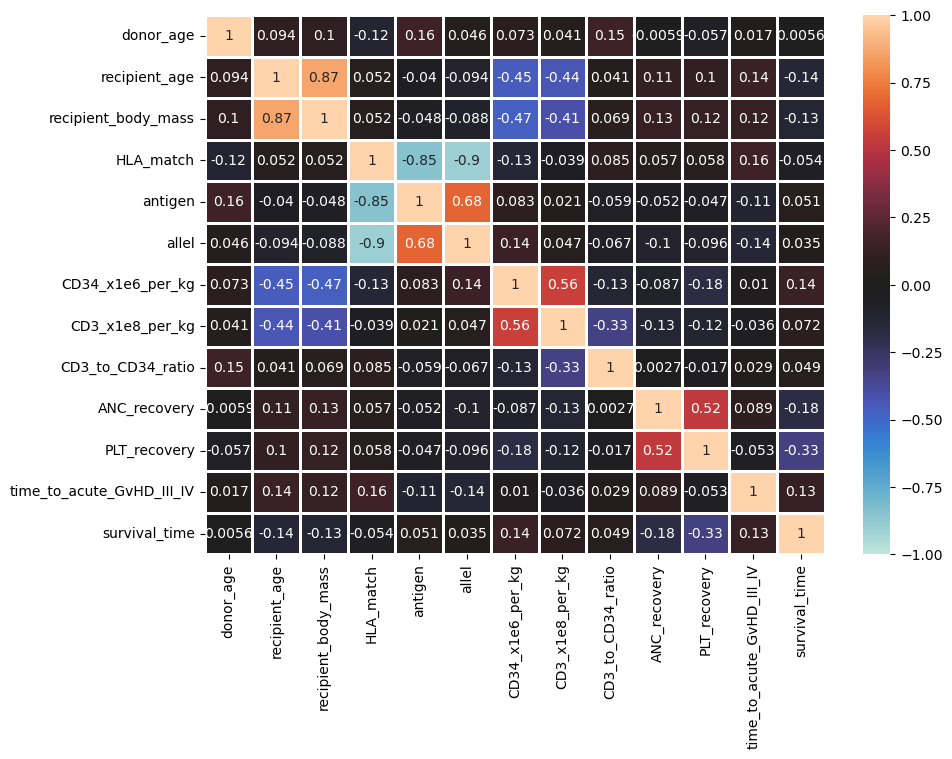

In [123]:
num_df = df[["donor_age", "recipient_age", "recipient_body_mass", "HLA_match", "antigen", "allel", "CD34_x1e6_per_kg","CD3_x1e8_per_kg", "CD3_to_CD34_ratio", "ANC_recovery", "PLT_recovery", "time_to_acute_GvHD_III_IV", "survival_time"]]

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(
    data=num_df.corr(method="pearson"),
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    linewidth=2
)

In [124]:
pd.crosstab([df["allel"], df["antigen"]], df["HLA_match"])

HLA_match      7   8   9   10
allel antigen                
-1    -1        0   0   0   1
0     0         0   0   0  93
1     2         0   0  47   0
      3         0   7   0   0
2     1         0   0  18   0
      2         0  14   0   0
3     1         0   2   0   0
      2         4   0   0   0
4     1         1   0   0   0

In [125]:
pd.crosstab([df["allel"], df["antigen"]], df["HLA_group_1"])

HLA_group_1    DRB1_cell  matched  mismatched  one_allel  one_antigen  \
allel antigen                                                           
-1    -1               0        1           0          0            0   
0     0                0       93           0          0            0   
1     2                6        0           0          0           41   
      3                0        0           0          0            0   
2     1                3        0           0         14            1   
      2                0        0           0          0            0   
3     1                0        0           0          0            0   
      2                0        0           4          0            0   
4     1                0        0           1          0            0   

HLA_group_1    three_diffs  two_diffs  
allel antigen                          
-1    -1                 0          0  
0     0                  0          0  
1     2                  0          0  
      3                  0          7  
2     1                  0          0  
      2                  3         11  
3     1                  1          1  
      2                  0          0  
4     1                  0          0

<Axes: xlabel='risk_group', ylabel='Count'>

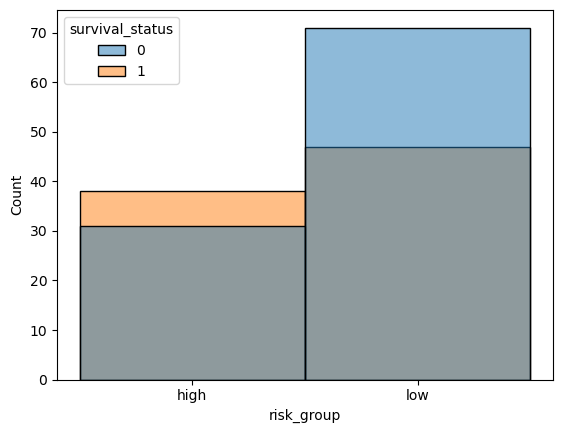

In [126]:
sns.histplot(
    x="risk_group",
    hue="survival_status",
    data=df
)

In [127]:
targets = df[["survival_time", "survival_status"]]


In [ ]:
from sklearn.model_selection import train_test_split
targets = targets.rename(columns={"survival_status": "is_dead"})


,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,1,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3,10,matched,0,0,matched,high,peripheral_blood,no,7.20,5.38,1.33876,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,2,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0,10,matched,0,0,matched,low,bone_marrow,no,4.50,0.41,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,3,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2,10,matched,0,0,matched,low,bone_marrow,no,7.94,0.42,19.01323,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,4,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1,10,matched,0,0,matched,low,bone_marrow,no,4.25,0.14,29.481647,23.0,29.0,yes,yes,19.0,-1,no,53.0,1
4,5,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0,9,matched,2,1,one_antigen,high,peripheral_blood,no,51.85,13.05,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,37.575342,no,A,present,12.9,no,10_20,male,44.0,A,minus,present,lymphoma,malignant,other,matched,3,10,matched,0,0,matched,high,peripheral_blood,yes,11.08,4.39,2.52275,15.0,22.0,yes,yes,16.0,no,yes,385.0,1
183,184,22.895890,yes,A,absent,13.9,no,10_20,female,44.5,0,plus,present,AML,malignant,other,mismatched,2,10,matched,0,0,matched,high,peripheral_blood,no,4.64,4.47,1.038858,12.0,30.0,no,no,1000000.0,no,no,634.0,1
184,185,27.347945,yes,A,present,10.4,no,10_20,female,33.0,B,plus,present,nonmalignant,nonmalignant,other,mismatched,3,10,matched,0,0,matched,low,peripheral_blood,no,7.73,4.73,1.635559,16.0,16.0,yes,no,1000000.0,no,no,1895.0,0
185,186,27.780822,yes,A,absent,8.0,yes,5_10,male,24.0,0,plus,absent,chronic,malignant,other,mismatched,0,9,matched,2,1,one_antigen,low,peripheral_blood,no,15.41,1.91,8.07777,13.0,14.0,yes,yes,54.0,yes,no,382.0,1


In [129]:
X = df.loc[:, : "stem_cell_source"]
y_clf = targets["is_dead"]
y_reg = targets["survival_time"]
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, y_reg, test_size=0.2, random_state=42)

In [134]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression

preprocessor = ColumnTransformer([

])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(n_jobs=-1))
])

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_clf_train, cv=3, scoring="f1_weighted", verbose=10, n_jobs=-1)
print(scores.mean())

y_pred = pipeline.predict(X_train)


InvalidParameterError: The 'estimator' parameter of check_scoring must be an object implementing 'fit'. Got       id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
95    96  21.128767                yes         0    absent           14.0   
69    70  24.476712                yes         0    absent           14.8   
109  110  39.249315                 no         0    absent            5.6   
29    30  39.172603                 no         A   present            8.4   
126  127  37.380822                 no         A    absent           17.8   
..   ...        ...                ...       ...       ...            ...   
106  107  30.594521                yes         0    absent           16.5   
14    15  30.676712                yes         A    absent           17.8   
92    93  30.835616                yes         0    absent            5.0   
179  180  30.024658                yes         A    absent            7.5   
102  103  40.183562                 no         0    absent           18.3   

    recipient_age_below_10 recipient_age_int recipient_gender  \
95                      no             10_20             male   
69                      no             10_20             male   
109                    yes              5_10             male   
29                     yes              5_10           female   
126                     no             10_20           female   
..                     ...               ...              ...   
106                     no             10_20           female   
14                      no             10_20             male   
92                     yes               0_5           female   
179                    yes              5_10             male   
102                     no             10_20           female   

    recipient_body_mass recipient_ABO recipient_rh recipient_CMV  \
95                 54.1             0         plus        absent   
69                 49.0             A         plus       present   
109                24.3             A         plus       present   
29                 38.3             A         plus       present   
126                51.3             0         plus        absent   
..                  ...           ...          ...           ...   
106                55.2             A         plus       present   
14                 55.0             A         plus        absent   
92                   -1             0         plus        absent   
179                28.0            AB        minus        absent   
102                  -1             0         plus       present   

          disease disease_group    gender_match   ABO_match CMV_status  \
95            ALL     malignant  female_to_male     matched          0   
69            AML     malignant           other  mismatched          2   
109  nonmalignant  nonmalignant           other  mismatched          2   
29            ALL     malignant           other     matched          3   
126           AML     malignant           other  mismatched          0   
..            ...           ...             ...         ...        ...   
106       chronic     malignant           other  mismatched          2   
14            AML     malignant           other     matched          0   
92            ALL     malignant           other     matched          0   
179           ALL     malignant  female_to_male  mismatched          0   
102           ALL     malignant           other     matched          2   

     HLA_match HLA_mismatch antigen allel  HLA_group_1 risk_group  \
95          10      matched       0     0      matched       high   
69           9      matched       1     2    one_allel       high   
109         10      matched       0     0      matched        low   
29          10      matched       0     0      matched        low   
126          8   mismatched       3     1    two_diffs       high   
..         ...          ...     ...   ...          ...        ...   
106          8   mismatched       3     1    two_diffs        low   
14          10      matched       0     0      matched       high   
92           9      matched       2     1  one_antigen        low   
179          9      matched       2     1  one_antigen        low   
102          9      matched       2     1  one_antigen       high   

     stem_cell_source  
95   peripheral_blood  
69   peripheral_blood  
109  peripheral_blood  
29   peripheral_blood  
126       bone_marrow  
..                ...  
106  peripheral_blood  
14   peripheral_blood  
92   peripheral_blood  
179       bone_marrow  
102  peripheral_blood  

[149 rows x 25 columns] instead.